### New Years Resolution Analysis

- _Dataset from __Kaggle__: contains about 5000 tweets of New Years Resolutions_
- _Tweet dates range from 2014-12-21 to 2015-01-02_

In [1]:
# Importing the required libraries
import pandas as pd
import re
import string
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from nltk.corpus import stopwords

In [2]:
# Reading the dataset and understanding its dimensions
ny_resolutions = pd.read_csv('new_year_resolutions.csv', sep = ';')
ny_resolutions.shape

(5002, 14)

In [3]:
# Setting a custom index for the dataframe ('tweet_id')
ny_resolutions.set_index('tweet_id', inplace = True)

In [4]:
# Selecting only the relevant columns
ny_resolutions = ny_resolutions[['gender', 'resolution_category', 'retweet_count', 'text']]
ny_resolutions.head()

,gender,resolution_category,retweet_count,text
tweet_id,,,,
"5,50363E+17",female,Health & Fitness,0.0,"#NewYearsResolution :: Read more books, No scr..."
"5,50363E+17",female,Humor,1.0,#NewYearsResolution Finally master @ZJ10 's pa...
"5,50362E+17",male,Personal Growth,0.0,#NewYearsResolution to stop being so damn perf...
"5,50362E+17",male,Philanthropic,0.0,My #NewYearsResolution is to help my disabled ...
"5,50362E+17",female,Personal Growth,0.0,#NewYearsResolution #2015Goals #2015bucketlist...


---

Let's start by analysing the tweet's text

In [5]:
# Removing '#', 'RT', hyperlinks, @mentions, punctuations, and stop words
def cleanText(text):
    text = re.sub(r'#', '', text)
    text = re.sub(r'RT[\s]+', '', text)
    text = re.sub(r'https?:\/\/\S+', '', text)
    text = re.sub(r'@[a-zA-Z0-9]+', '', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = ' '.join([word for word in text.split() if word not in stopwords.words("english")])
    return text

ny_resolutions['text'] = ny_resolutions['text'].apply(cleanText)
ny_resolutions['text'].head()

tweet_id
5,50363E+17    NewYearsResolution Read books No scrolling FBc...
5,50363E+17    NewYearsResolution Finally master part Kitchen...
5,50362E+17                    NewYearsResolution stop damn perf
5,50362E+17    My NewYearsResolution help disabled patients d...
5,50362E+17    NewYearsResolution 2015Goals 2015bucketlist co...
Name: text, dtype: object

---

Let's analyse the subjectivity and polarity of the tweet's text:
- Subjectivity: ranges from 0 to 1, with 0 being objective and 1 being subjective
- Polarity: ranges from -1 to 1, with -1 being negative and 1 being positive 

In [6]:
# Creating functions to determine the Subjectivity and Polarity as well as creating new columns in the dataframe to include Subjectivity and Polarity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
    return TextBlob(text).sentiment.polarity

ny_resolutions['subjectivity'] = ny_resolutions['text'].apply(getSubjectivity)
ny_resolutions['polarity'] = ny_resolutions['text'].apply(getPolarity)

ny_resolutions[['text', 'subjectivity', 'polarity']]

,text,subjectivity,polarity
tweet_id,,,
"5,50363E+17",NewYearsResolution Read books No scrolling FBc...,0.000000,0.000
"5,50363E+17",NewYearsResolution Finally master part Kitchen...,1.000000,0.000
"5,50362E+17",NewYearsResolution stop damn perf,0.000000,0.000
"5,50362E+17",My NewYearsResolution help disabled patients d...,0.510714,0.100
"5,50362E+17",NewYearsResolution 2015Goals 2015bucketlist co...,0.000000,0.000
...,...,...,...
"5,50346E+17",Tomorrow I start comes highly recommended NewY...,0.540000,0.160
"5,50347E+17",holy crap people EYES OPEN WHEN DRIVING NewYea...,0.650000,-0.400
"5,50347E+17",SHabby Start parody blog NYResolutions Start G...,0.950000,0.425


In [7]:
# Getting the sentiment associated with each tweet based on its polarity
def getSentiment(polarity):
    if polarity == 0:
        return 'Neutral'
    elif polarity < 0:
        return 'Negative'
    else:
        return 'Positive'
    
ny_resolutions['sentiment'] = ny_resolutions['polarity'].apply(getSentiment)
ny_resolutions.head()

,gender,resolution_category,retweet_count,text,subjectivity,polarity,sentiment
tweet_id,,,,,,,
"5,50363E+17",female,Health & Fitness,0.0,NewYearsResolution Read books No scrolling FBc...,0.000000,0.0,Neutral
"5,50363E+17",female,Humor,1.0,NewYearsResolution Finally master part Kitchen...,1.000000,0.0,Neutral
"5,50362E+17",male,Personal Growth,0.0,NewYearsResolution stop damn perf,0.000000,0.0,Neutral
"5,50362E+17",male,Philanthropic,0.0,My NewYearsResolution help disabled patients d...,0.510714,0.1,Positive
"5,50362E+17",female,Personal Growth,0.0,NewYearsResolution 2015Goals 2015bucketlist co...,0.000000,0.0,Neutral


Positive    2529
Neutral     1699
Negative     774
Name: sentiment, dtype: int64


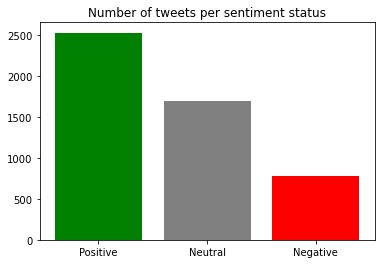

In [9]:
# Finding sentiment split and plotting its results
sentimentSplit = ny_resolutions['sentiment'].value_counts()
print(sentimentSplit)

x = sentimentSplit.index
h = sentimentSplit.values
c = ['green', 'grey', 'red']

plt.bar(x, height = h, color = c)
plt.title('Number of tweets per sentiment status')
plt.show()

In [10]:
# Finding sentiment split (percentage)
sentimentPerc = round((sentimentSplit / ny_resolutions.shape[0]) * 100, 1)
sentimentPerc

Positive    50.6
Neutral     34.0
Negative    15.5
Name: sentiment, dtype: float64

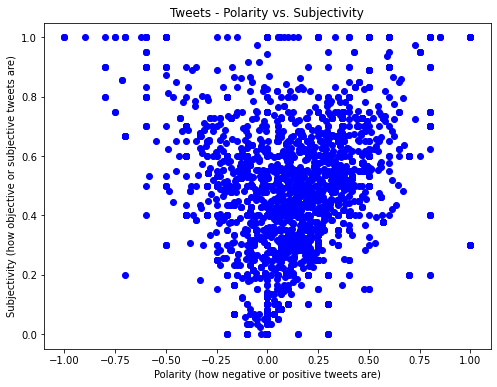

In [12]:
# Visualising 'subjectivity' and polarity of the tweets
plt.figure(figsize = (8,6))
for i in range(0, ny_resolutions.shape[0]):
    plt.scatter(ny_resolutions['polarity'][i], ny_resolutions['subjectivity'][i], color = 'Blue')
plt.title('Tweets - Polarity vs. Subjectivity')
plt.xlabel('Polarity (how negative or positive tweets are)')
plt.ylabel('Subjectivity (how objective or subjective tweets are)')
plt.show()

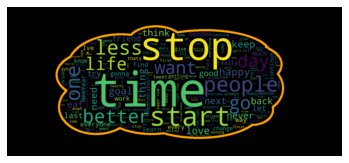

In [237]:
# Creating a word cloud to visualise the most commonly occuring words: for the purpose of this word cloud, let's remove the words in 'New Years Resolutions', which not surprisingly, are the most frequently occurring words

allTweets = ' '.join([text for text in ny_resolutions['text']]).split()
allTweets = [word for word in allTweets 
    if word.lower() not in('newyearsresolution', 'new', 'year', 'years', 'resolution', 'resolutions')]
allTweets = ' '.join(allTweets)

custom_mask = np.array(Image.open('image_word_cloud.png'))

wordCloud = WordCloud(stopwords = STOPWORDS, mask = custom_mask, contour_color = 'orange', contour_width = 15, max_font_size = 200).generate(allTweets)
plt.imshow(wordCloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

---

Analysing individual words
